### Exercicio tSNE
- Nome: Cristiano Moreira Martins
- Matricula: 11111871

In [98]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#remove warnings
warnings.filterwarnings('ignore')

In [155]:
def tsne_silhouette_score(tsne_results, n_clusters, random_state=42):
    """
    Computes the silhouette score for t-SNE results.
    
    Parameters:
    - tsne_results: 2D array or DataFrame containing t-SNE results.
    - n_clusters: Number of clusters expected in the data (this is needed for silhouette score).
    
    Returns:
    - Silhouette score.
    """
    
    # Using KMeans to get cluster labels for t-SNE results
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(tsne_results)
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(tsne_results, cluster_labels)
    
    return silhouette_avg


In [90]:

def plot_tsne_results(tsne_results, n_components, state, labels=None):
    """
    Plots the 2D t-SNE results.
    
    Parameters:
    - tsne_results: A 2D array or DataFrame containing the t-SNE results.
    - n_components: Number of components used in the t-SNE algorithm.
    - state: Random state used in the t-SNE algorithm.
    - labels: Labels for each data point for coloring. If None, all points are colored with the same color.
    """
    
    # Extracting the two dimensions from the results
    x = tsne_results[:, 0]
    y = tsne_results[:, 1]
    
    plt.figure(figsize=(8, 6))
    
    # If labels are provided, plot using different colors for each label
    if labels is not None:
        unique_labels = list(set(labels))
        for label in unique_labels:
            idx = labels == label
            plt.scatter(x[idx], y[idx], label=label, alpha=0.7)
        plt.legend()
    else:
        plt.scatter(x, y, alpha=0.7)
    
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(f't-SNE {n_components} Components - Random State {state}')
    plt.grid(True)
    plt.show()



In [135]:
path = 'D:/Disco/Data/openml/BreastCancer/Breast_GSE45827.csv'
numbers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 42, 43, 47]

In [39]:
#carrega os dados
data = pd.read_csv(path)
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


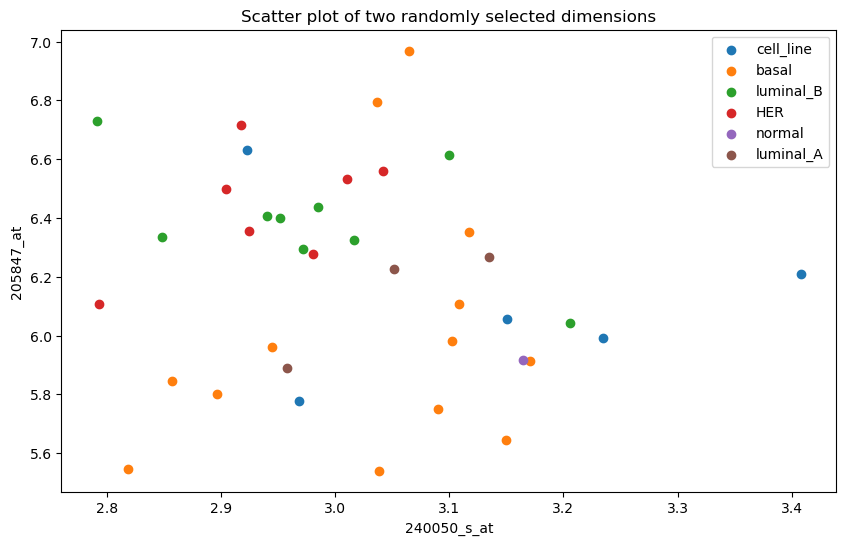

In [66]:
#escolhe duas colunas aleatorias para plotar os dados
subset_data = data.sample(frac=0.25, random_state=42)

random_columns = np.random.choice(subset_data.columns[2:], 2, replace=False)

plt.figure(figsize=(10, 6))
for label in subset_data['type'].unique():
    plt.scatter(subset_data[subset_data['type'] == label][random_columns[0]], 
                subset_data[subset_data['type'] == label][random_columns[1]], label=label)

plt.xlabel(random_columns[0])
plt.ylabel(random_columns[1])
plt.legend()
plt.title("Scatter plot of two randomly selected dimensions")
plt.show()


In [67]:
#cria uma coluna para os tipos existentes, transformando-os em numerico
factors = pd.factorize(data['type'])
data['type_fac'] = factors[0]
data[['type', 'type_fac']]

,type,type_fac
0,basal,0
1,basal,0
2,basal,0
3,basal,0
4,basal,0
...,...,...
146,luminal_B,5
147,luminal_B,5
148,luminal_B,5
149,luminal_B,5


In [68]:
#normaliza os dados para o TSNE, exceto as duas colunas que serão usadas para o plot
features = data.drop(columns=['samples', 'type'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type_fac
0,-0.799563,0.661843,0.310655,0.041789,-0.985780,-0.672168,-1.225551,-0.994281,0.659284,-1.299077,...,0.080212,-1.420761,-1.019820,-1.586264,-0.795871,-1.350590,0.515882,-0.797128,1.261521,-1.171087
1,-0.781052,0.824165,1.302215,1.050345,-0.225934,0.362588,-0.660486,-0.421679,-0.012215,-0.651294,...,-0.037917,-1.059594,-1.045899,-0.994320,-0.475575,-0.820200,0.172268,0.439288,-1.078765,-1.171087
2,-0.385048,1.852277,-0.760019,1.057150,-0.374541,-1.168619,-1.737551,-0.939433,0.992361,-0.729226,...,-0.264817,-1.566864,-1.650422,-1.491320,-0.614973,-1.053240,-0.765917,-0.506593,-0.150957,-1.171087
3,-0.951940,-0.390221,0.395305,-1.069436,-0.022818,0.768958,0.570620,-0.475208,0.751545,-1.229081,...,-0.282588,-1.087174,-0.912211,-1.183305,-0.589387,-1.156024,1.215592,-0.683360,0.972711,-1.171087
4,-1.522007,0.162605,0.729207,-0.017658,-0.096782,0.469116,0.166878,-0.941935,0.981465,-1.112820,...,0.102841,-0.871125,-0.797066,-1.412480,-0.767891,-0.999562,0.403562,-1.231830,0.197695,-1.171087


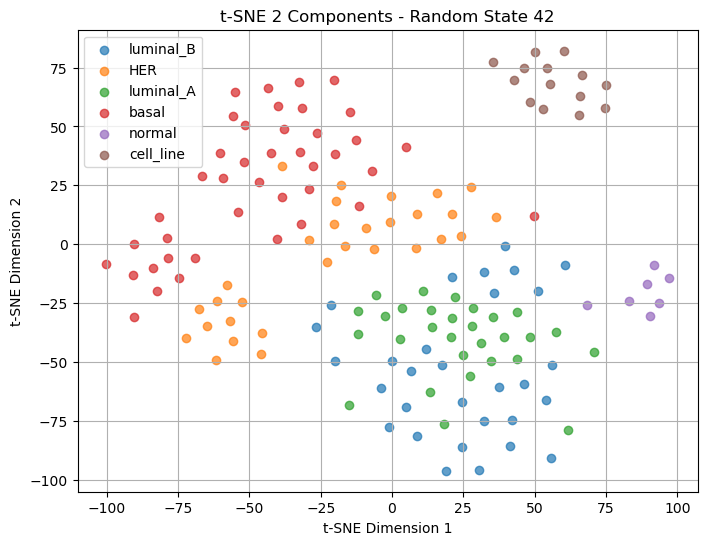

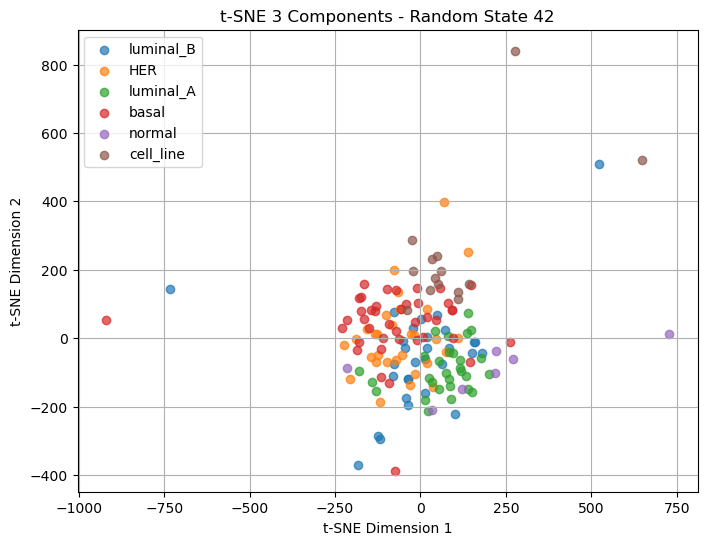

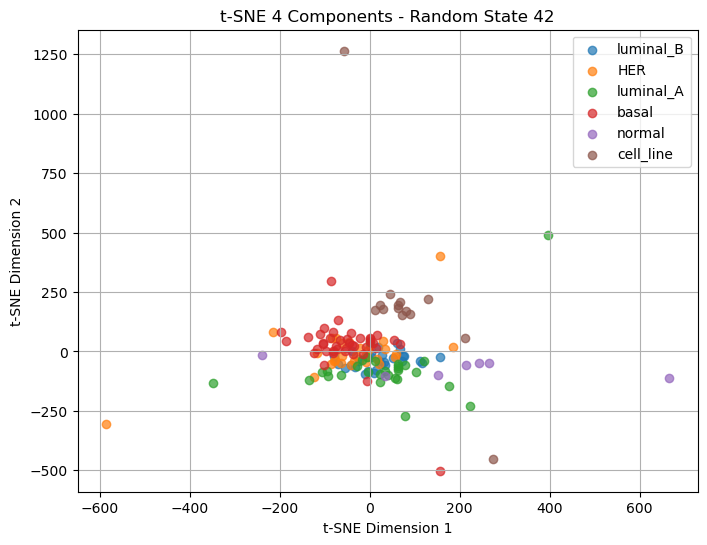

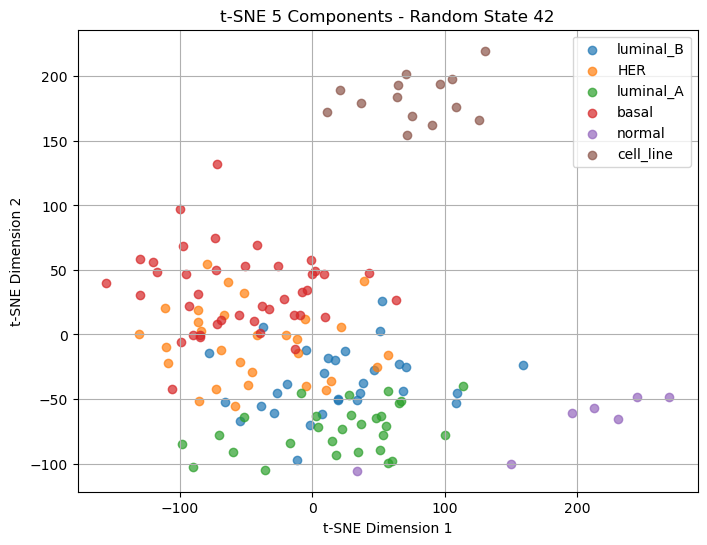

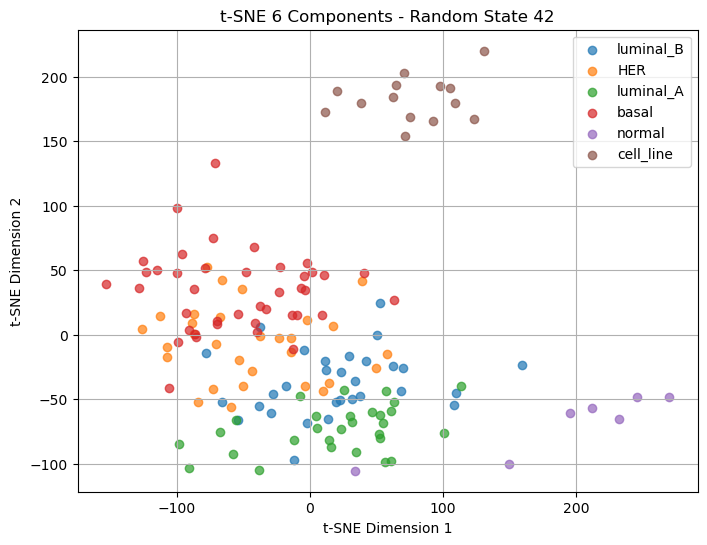

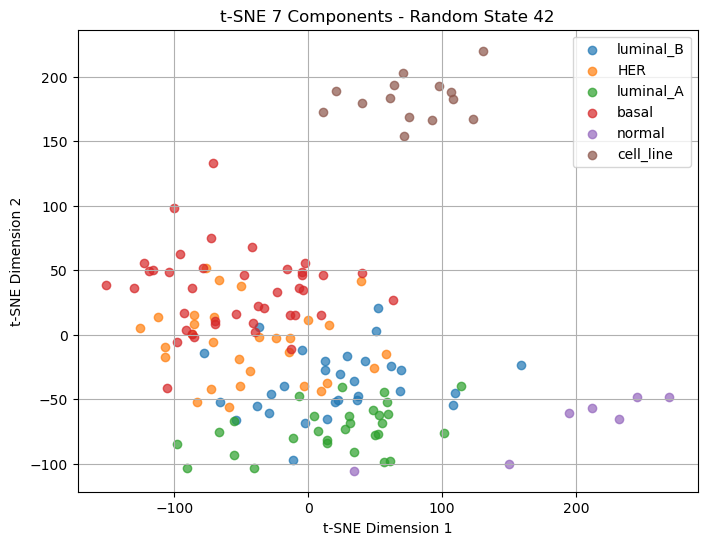

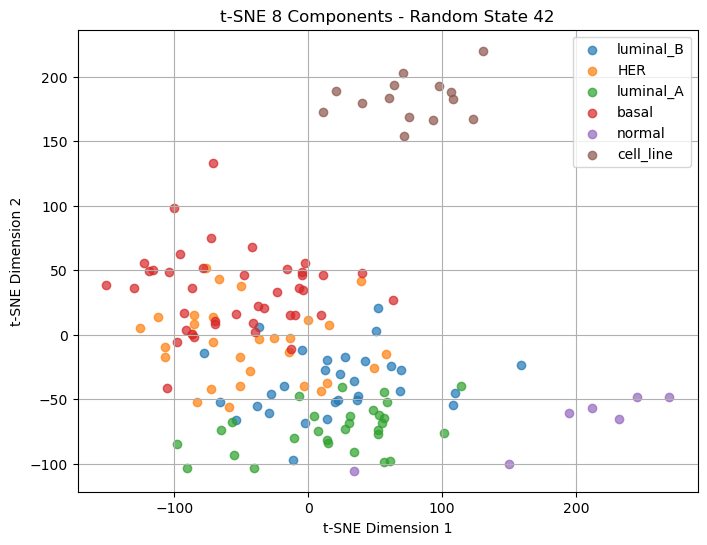

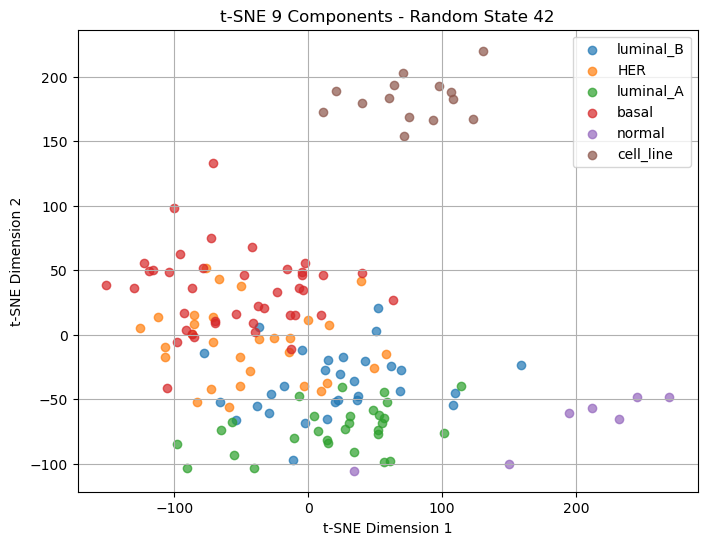

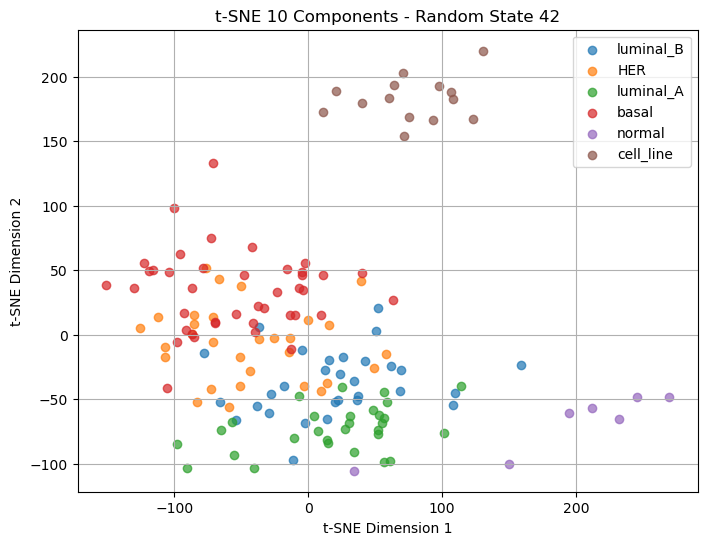

In [136]:
# Aplicando t-SNE
r_s=42
for n_c in range(2, 11):
    tsne = TSNE(n_components=n_c, init='pca', method='exact', random_state=r_s)
    data_tsne = tsne.fit_transform(scaled_df)
    plot_tsne_results(data_tsne, n_c, r_s, labels=data['type'])


In [156]:
#tenta encontrar o melhor resultado para o TSNE, calculando o silhouette score para cada combinação de n_components e random_state
results = pd.DataFrame(columns=['n_components', 'random_state', 'silhouette_score'])
for p in numbers:
    for n_c in range(2, 11):
        tsne = TSNE(n_components=n_c, init='pca', method='exact', random_state=p)
        data_tsne = tsne.fit_transform(scaled_df)
        score = tsne_silhouette_score(data_tsne, n_clusters=n_c, random_state=p)
        results = results.append({'n_components': n_c, 'random_state': p, 'silhouette_score': score}, ignore_index=True)

In [158]:
results['n_components'] = results['n_components'].astype(int)
results['random_state'] = results['random_state'].astype(int)

results.sort_values(by='silhouette_score', ascending=False, inplace=True)
results.head(10)

,n_components,random_state,silhouette_score
29,4,7,0.841293
100,3,37,0.839414
101,4,37,0.812200
74,4,23,0.805605
127,3,43,0.798254
92,4,31,0.779512
20,4,5,0.766024
83,4,29,0.764551
137,4,47,0.761631
119,4,42,0.760102


n_components: 4, random_state: 7, silhouette_score: 0.8412929773330688


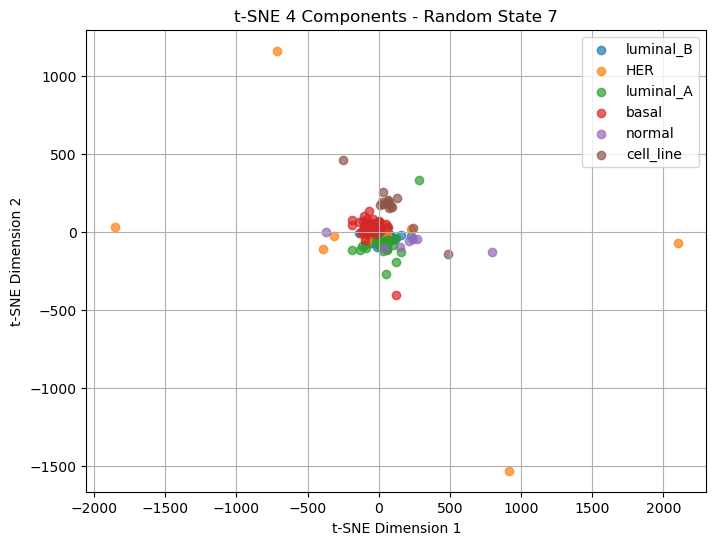

n_components: 3, random_state: 37, silhouette_score: 0.8394138216972351


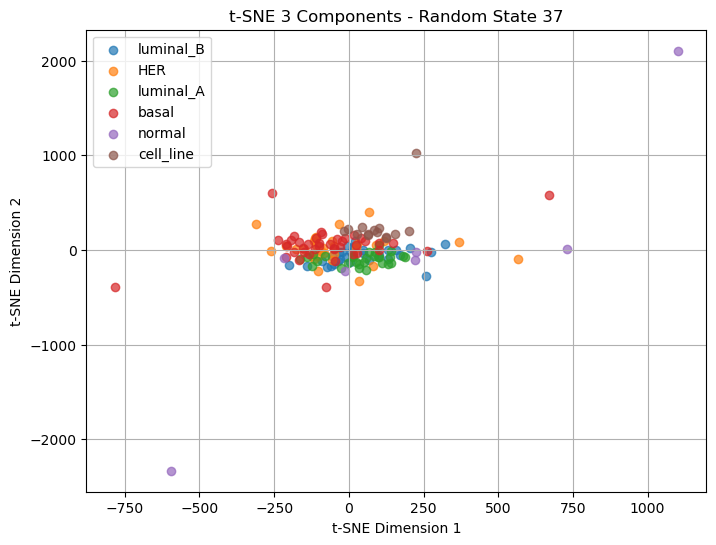

n_components: 4, random_state: 37, silhouette_score: 0.8121996521949768


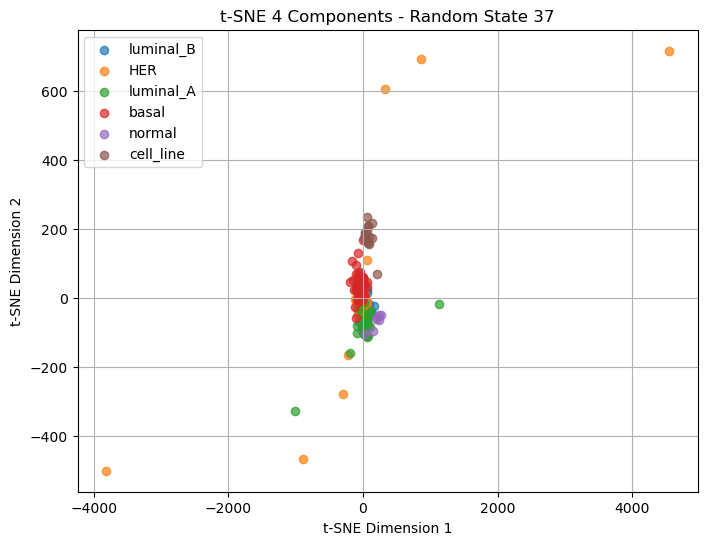

n_components: 4, random_state: 23, silhouette_score: 0.8056048154830933


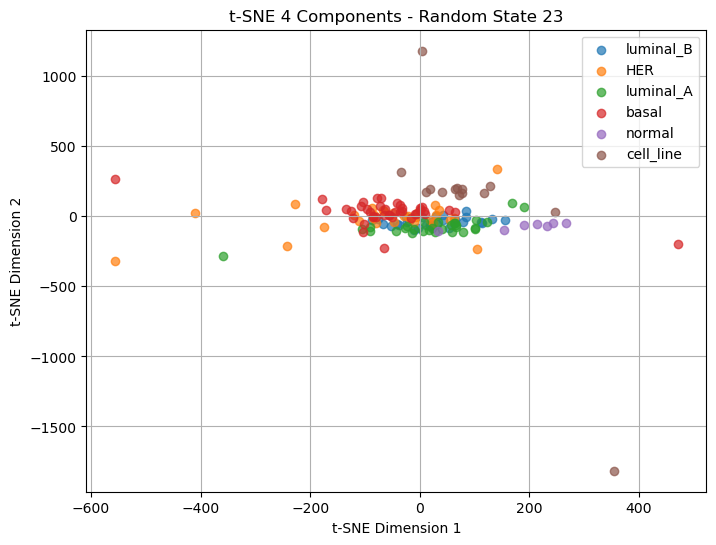

n_components: 3, random_state: 43, silhouette_score: 0.7982535362243652


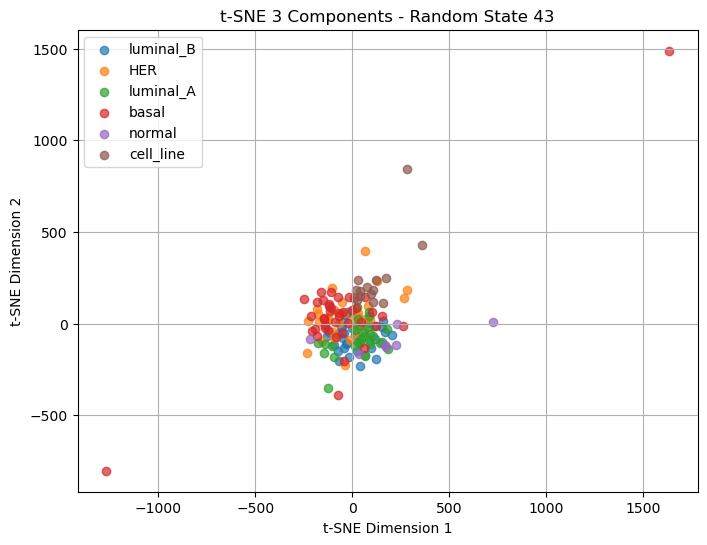

n_components: 4, random_state: 31, silhouette_score: 0.7795122265815735


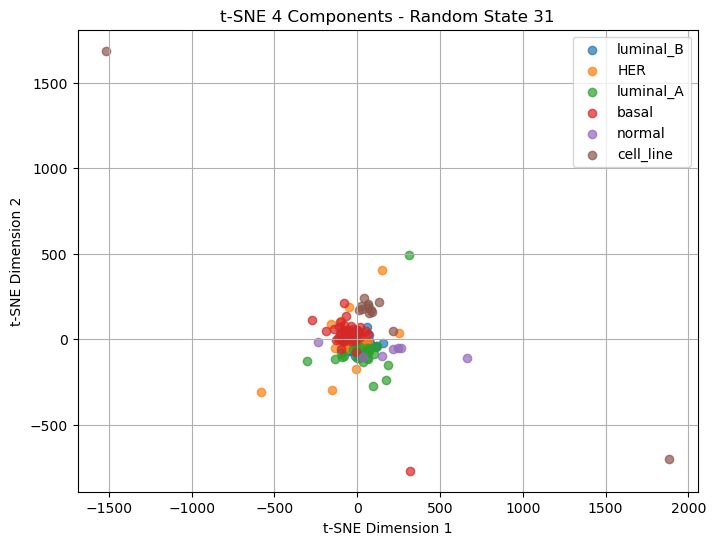

n_components: 4, random_state: 5, silhouette_score: 0.7660244703292847


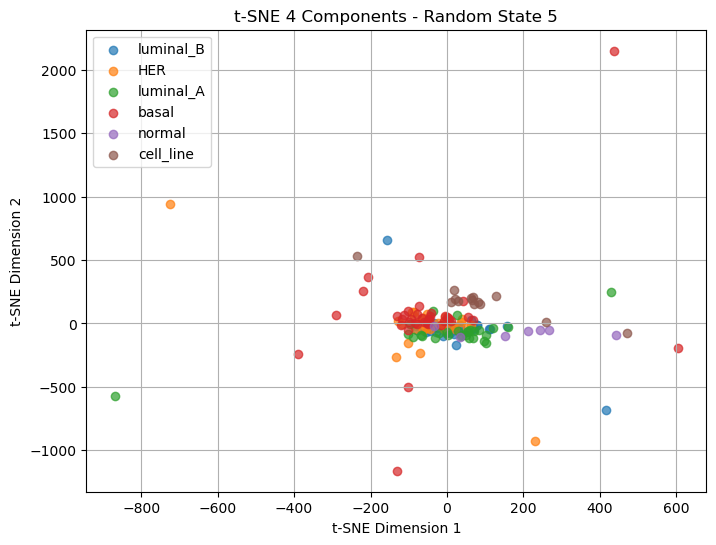

n_components: 4, random_state: 29, silhouette_score: 0.7645507454872131


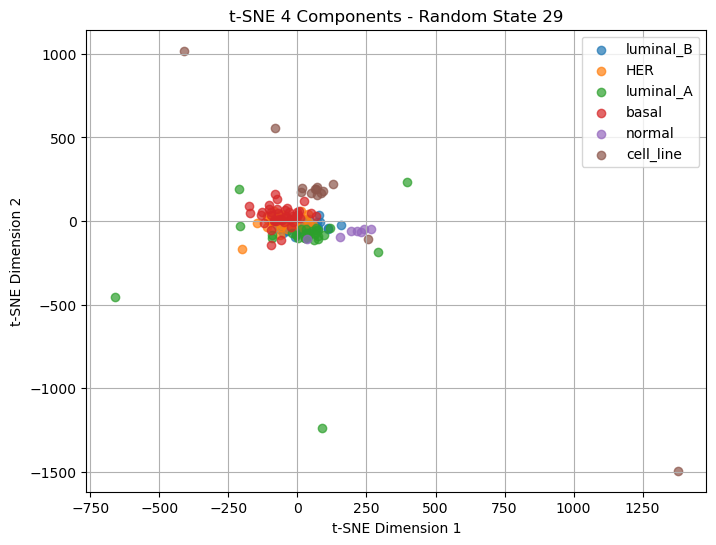

n_components: 4, random_state: 47, silhouette_score: 0.7616311311721802


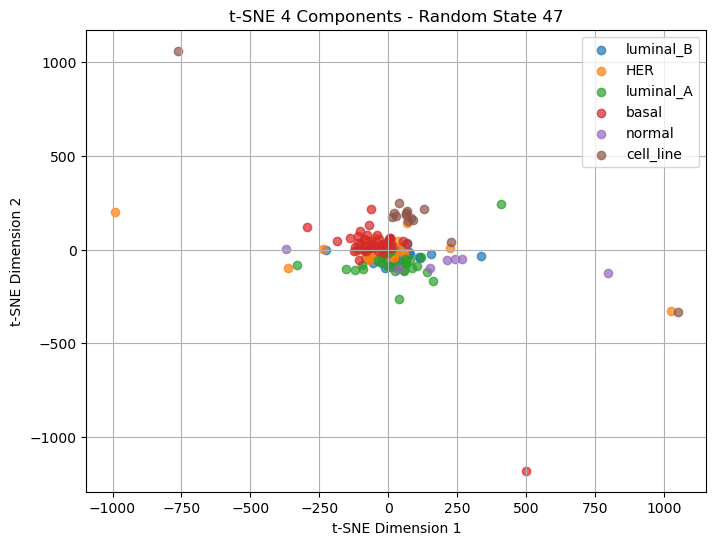

n_components: 4, random_state: 42, silhouette_score: 0.7601022720336914


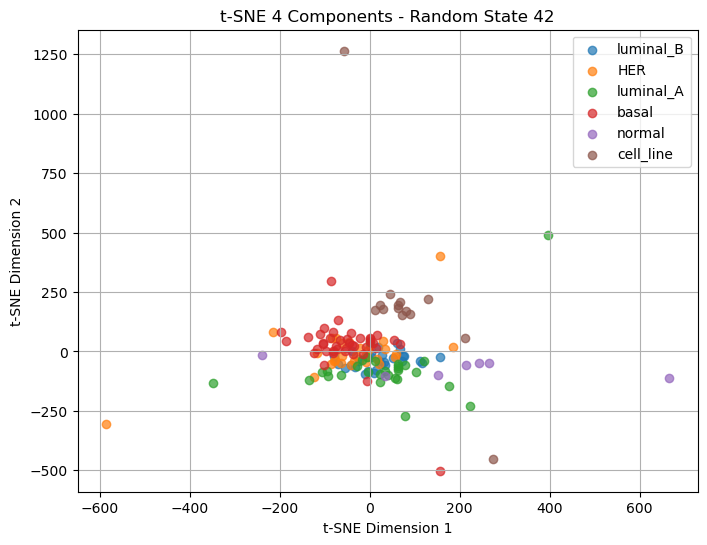

In [159]:
# verifica visualmente os 10 melhores resultados
for result in results.head(10).to_dict('records'):
    #print(result['n_components'])
    print(f"n_components: {result['n_components']}, random_state: {result['random_state']}, silhouette_score: {result['silhouette_score']}")
    tsne = TSNE(n_components=result['n_components'], init='pca', method='exact', random_state=result['random_state'])
    data_tsne = tsne.fit_transform(scaled_df)
    plot_tsne_results(data_tsne, result['n_components'], result['random_state'], labels=data['type'])

In [160]:
#escolhe os resultados para pequeno numero de componentes
results[results['n_components'] <= 2].head(15)

,n_components,random_state,silhouette_score
18,2,5,0.460825
72,2,23,0.458657
54,2,17,0.445220
81,2,29,0.433391
135,2,47,0.413750
0,2,2,0.402052
45,2,13,0.401048
90,2,31,0.400987
9,2,3,0.397906
117,2,42,0.396653


n_components: 2, random_state: 5, silhouette_score: 0.46082523465156555


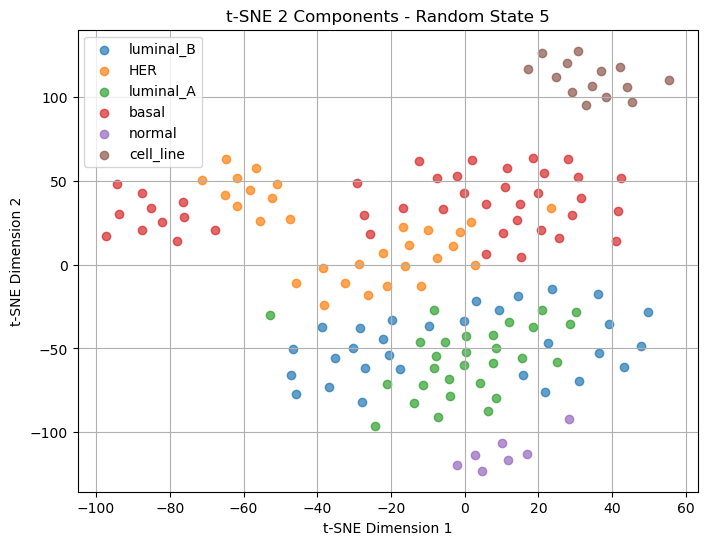

n_components: 2, random_state: 23, silhouette_score: 0.45865675806999207


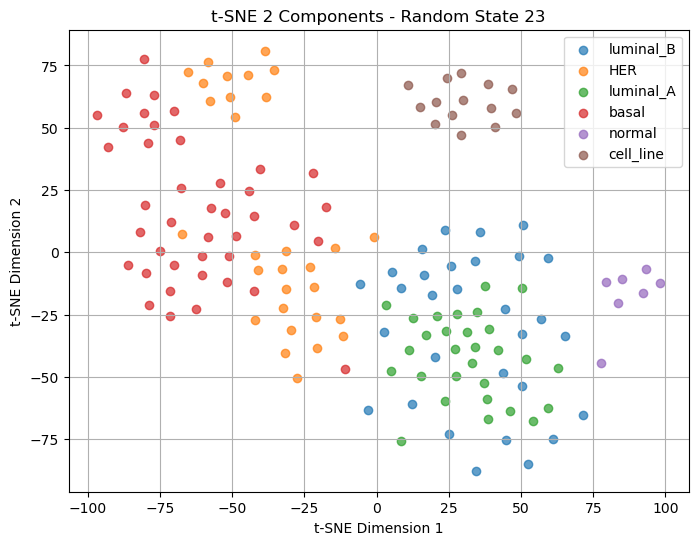

n_components: 2, random_state: 17, silhouette_score: 0.44522014260292053


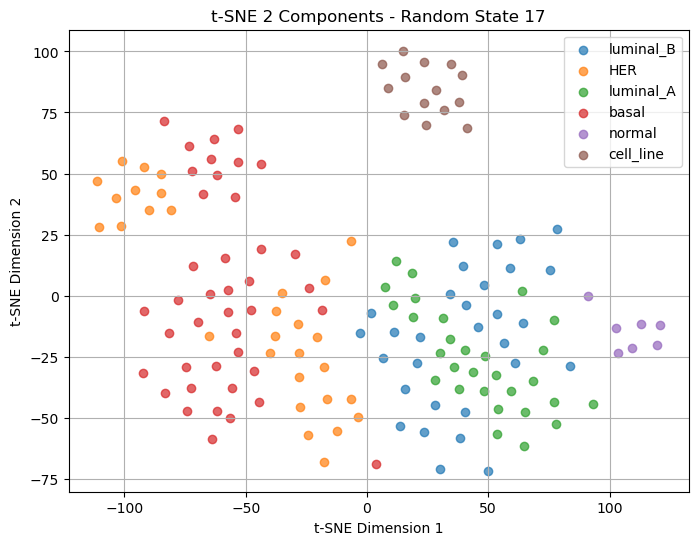

n_components: 2, random_state: 29, silhouette_score: 0.43339064717292786


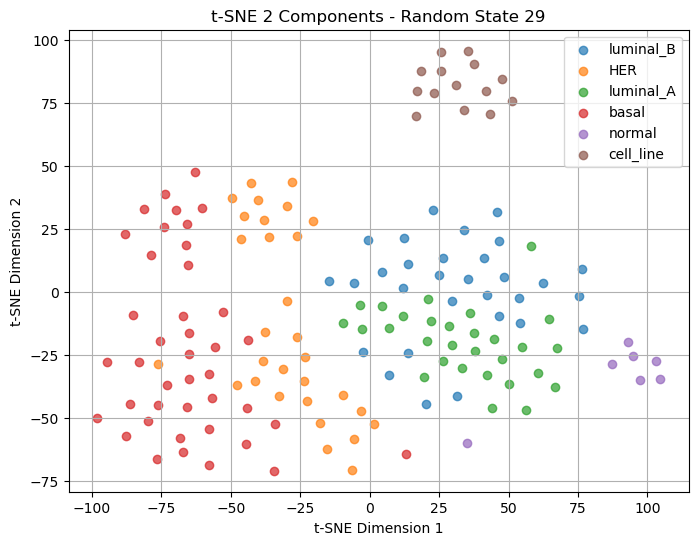

n_components: 2, random_state: 47, silhouette_score: 0.4137501120567322


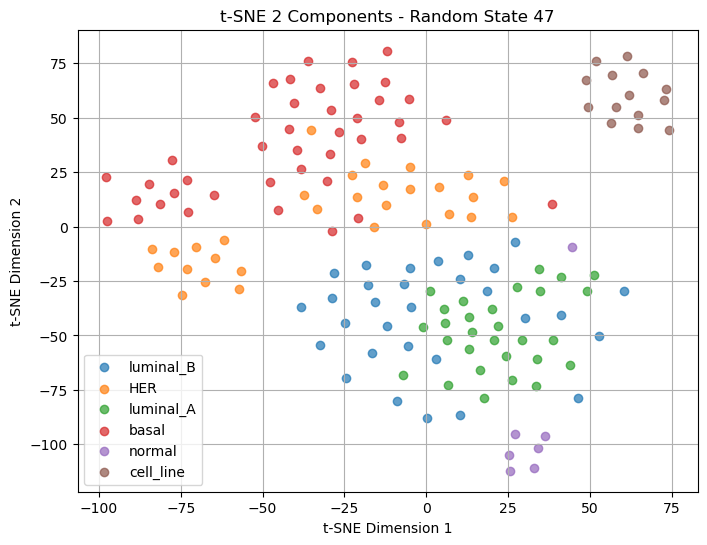

n_components: 2, random_state: 2, silhouette_score: 0.40205156803131104


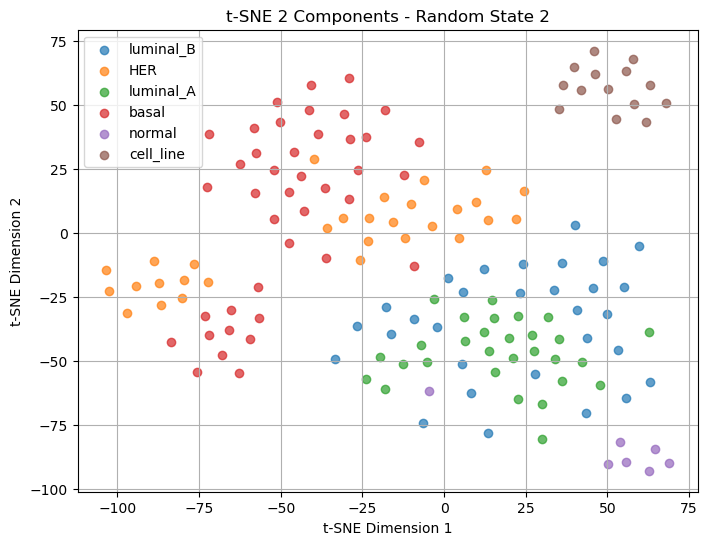

n_components: 2, random_state: 13, silhouette_score: 0.40104833245277405


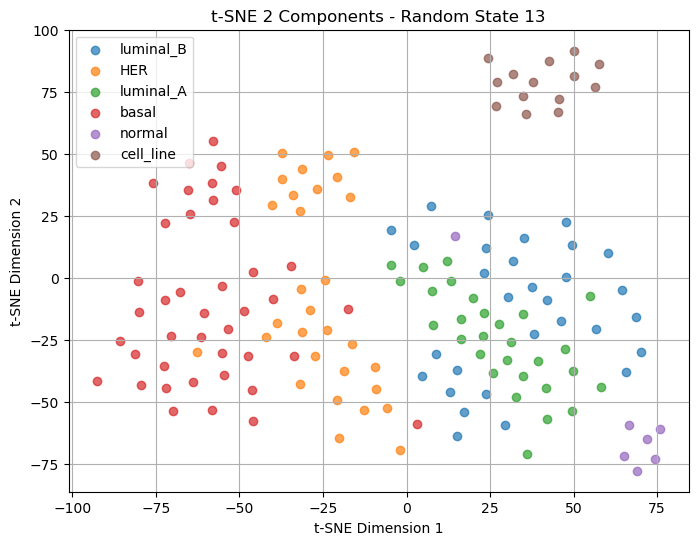

n_components: 2, random_state: 31, silhouette_score: 0.400987446308136


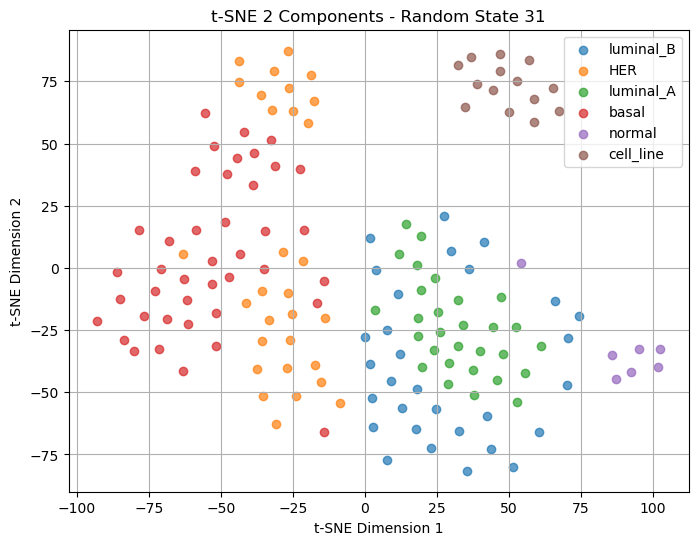

n_components: 2, random_state: 3, silhouette_score: 0.397905558347702


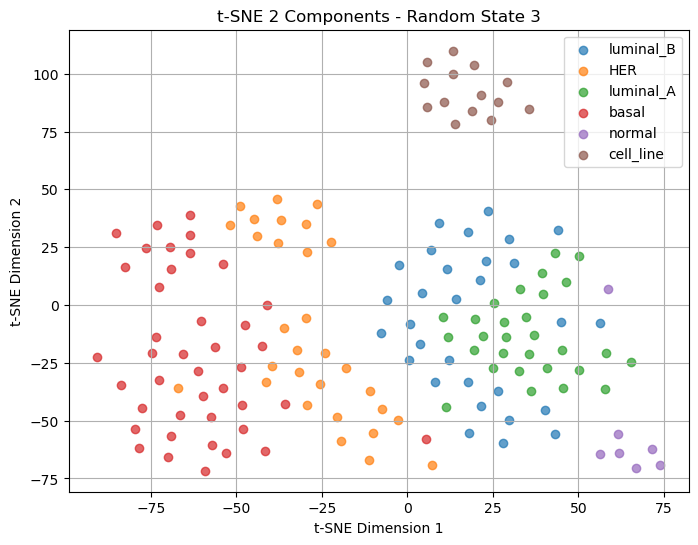

n_components: 2, random_state: 42, silhouette_score: 0.39665308594703674


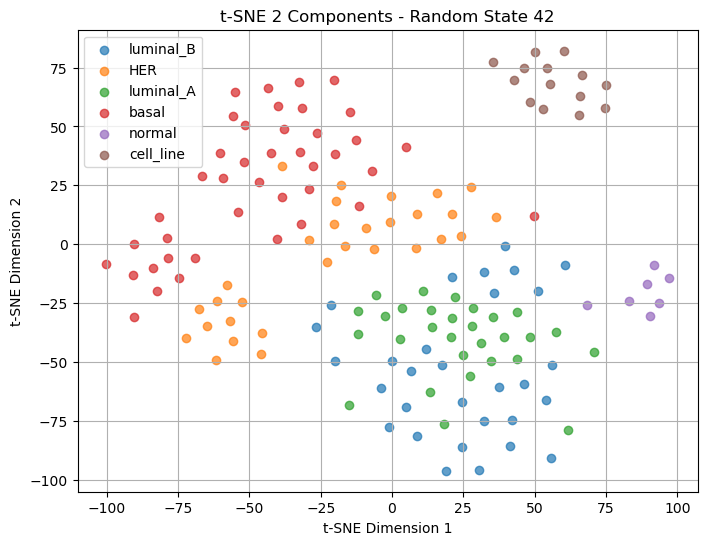

In [161]:
for result in results[results['n_components'] <= 2].head(10).to_dict('records'):
    #print(result['n_components'])
    print(f"n_components: {result['n_components']}, random_state: {result['random_state']}, silhouette_score: {result['silhouette_score']}")
    tsne = TSNE(n_components=result['n_components'], init='pca', method='exact', random_state=result['random_state'])
    data_tsne = tsne.fit_transform(scaled_df)
    plot_tsne_results(data_tsne, result['n_components'], result['random_state'], labels=data['type'])

### Aparentemente os melhores resultados são apresentados utilizando apenas dois componentes como parâmetro.
### Apesar de resultar em um silhouette score melhor com um número maior de componentes, isso não indica que exista uma separação visual melhor

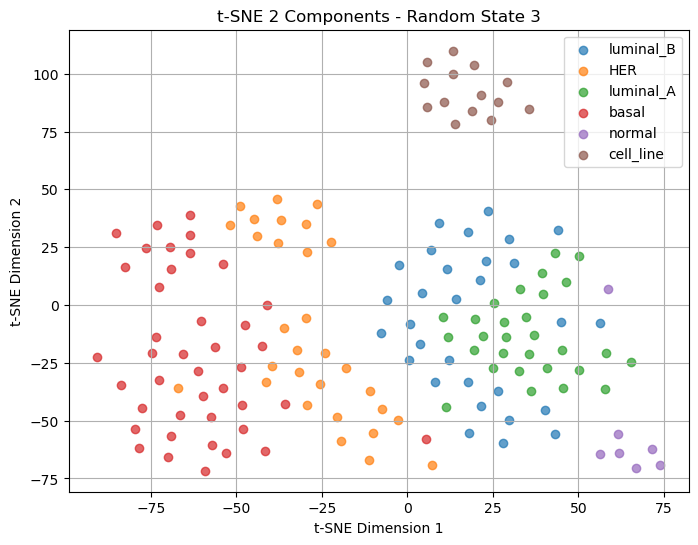

In [162]:
tsne = TSNE(n_components=2, init='pca', method='exact', random_state=3)
data_tsne = tsne.fit_transform(scaled_df)
plot_tsne_results(data_tsne, 2, 3, labels=data['type'])